### Matriz de Correlación

In [60]:
#importar la libreria de pandas para leer los datos
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix

# Configuración matplotlib
# ==============================================================================
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
#from matplotlib import cm
import sklearn.model_selection as model_selection
#from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

**Cargando Dataframe**

In [61]:
datos = pd.read_csv(r"C:\Users\JUANPABLOGASCA\Desktop\Parcial3_Sistemas_Inteligentes\Features_EMG_P10_MyoArmband.csv",delimiter=',',parse_dates=False,skipinitialspace=True, skiprows=0)
#datos.dropna(how='all')
datos

EMAV       EWL       MAV        WL  ZC  SSC       RMS       AAC  \
0      0.092832  5.400924  0.026875  1.789062  19    2  0.045635  0.036511   
1      0.079050  4.254924  0.019688  1.304688  19    2  0.029106  0.026626   
2      0.064001  3.124028  0.012656  0.773438  10    9  0.016573  0.015784   
3      0.050815  2.954137  0.010000  0.625000   9    8  0.012979  0.012755   
4      0.057592  3.167502  0.011875  0.781250   8    9  0.015934  0.015944   
...         ...       ...       ...       ...  ..  ...       ...       ...   
11419  0.061535  2.152507  0.010781  0.460938   7    5  0.012646  0.009407   
11420  0.064933  2.506741  0.012031  0.507812   7   10  0.013932  0.010364   
11421  0.050219  1.819601  0.008438  0.390625   4    5  0.010482  0.007972   
11422  0.056379  2.725826  0.010000  0.523438   9    7  0.012500  0.010682   
11423  0.071974  3.715076  0.016250  1.054688   8    4  0.024105  0.021524   

          DASDV   LD      MMAV     MMAV2  MYOP       SSI       VAR   WAMP  \
0      0.056281  0.0  0.020000  0.022587  0.00  0.104126  0.001989   28.0   
1      0.036354  0.0  0.014609  0.015894  0.34  0.042358  0.000759   28.0   
2      0.020244  0.0  0.008984  0.008837  0.00  0.013733  0.000190  114.0   
3      0.016173  0.0  0.007891  0.007744  0.00  0.008423  0.000112  214.0   
4      0.018940  0.0  0.009062  0.008837  0.00  0.012695  0.000172  211.0   
...         ...  ...       ...       ...   ...       ...       ...    ...   
11419  0.012277  0.0  0.008047  0.008263  0.00  0.007996  0.000075  135.0   
11420  0.013532  0.0  0.008672  0.008512  0.00  0.009705  0.000084  145.0   
11421  0.011491  0.0  0.006484  0.006419  0.54  0.005493  0.000058   99.0   
11422  0.012577  0.0  0.007656  0.007400  0.00  0.007812  0.000090   78.0   
11423  0.037267  0.0  0.012812  0.012475  0.64  0.029053  0.000510   93.0   

            MFL  Label  
0     -0.404537      0  
1     -0.594352      0  
2     -0.848612      0  
3     -0.946100      0  
4     -0.877514      0  
...         ...    ...  
11419 -1.065817      5  
11420 -1.023551      5  
11421 -1.094557      5  
11422 -1.055308      5  
11423 -0.583573      5  

[11424 rows x 18 columns]

In [70]:
datos.describe().transpose()
datos = datos.dropna()
datos

EMAV       EWL       MAV        WL  ZC  SSC       RMS       AAC  \
0      0.092832  5.400924  0.026875  1.789062  19    2  0.045635  0.036511   
1      0.079050  4.254924  0.019688  1.304688  19    2  0.029106  0.026626   
2      0.064001  3.124028  0.012656  0.773438  10    9  0.016573  0.015784   
3      0.050815  2.954137  0.010000  0.625000   9    8  0.012979  0.012755   
4      0.057592  3.167502  0.011875  0.781250   8    9  0.015934  0.015944   
...         ...       ...       ...       ...  ..  ...       ...       ...   
11419  0.061535  2.152507  0.010781  0.460938   7    5  0.012646  0.009407   
11420  0.064933  2.506741  0.012031  0.507812   7   10  0.013932  0.010364   
11421  0.050219  1.819601  0.008438  0.390625   4    5  0.010482  0.007972   
11422  0.056379  2.725826  0.010000  0.523438   9    7  0.012500  0.010682   
11423  0.071974  3.715076  0.016250  1.054688   8    4  0.024105  0.021524   

          DASDV   LD      MMAV     MMAV2  MYOP       SSI       VAR   WAMP  \
0      0.056281  0.0  0.020000  0.022587  0.00  0.104126  0.001989   28.0   
1      0.036354  0.0  0.014609  0.015894  0.34  0.042358  0.000759   28.0   
2      0.020244  0.0  0.008984  0.008837  0.00  0.013733  0.000190  114.0   
3      0.016173  0.0  0.007891  0.007744  0.00  0.008423  0.000112  214.0   
4      0.018940  0.0  0.009062  0.008837  0.00  0.012695  0.000172  211.0   
...         ...  ...       ...       ...   ...       ...       ...    ...   
11419  0.012277  0.0  0.008047  0.008263  0.00  0.007996  0.000075  135.0   
11420  0.013532  0.0  0.008672  0.008512  0.00  0.009705  0.000084  145.0   
11421  0.011491  0.0  0.006484  0.006419  0.54  0.005493  0.000058   99.0   
11422  0.012577  0.0  0.007656  0.007400  0.00  0.007812  0.000090   78.0   
11423  0.037267  0.0  0.012812  0.012475  0.64  0.029053  0.000510   93.0   

            MFL  Label  
0     -0.404537      0  
1     -0.594352      0  
2     -0.848612      0  
3     -0.946100      0  
4     -0.877514      0  
...         ...    ...  
11419 -1.065817      5  
11420 -1.023551      5  
11421 -1.094557      5  
11422 -1.055308      5  
11423 -0.583573      5  

[9536 rows x 18 columns]

In [71]:
X = datos.iloc[:,:-1]
y = datos.iloc[:,17:]

In [72]:
print("The DataFrame of Employees is:")
print(X, "\n")

corr_df = X.corr()
print("The correlation DataFrame is:")
print(corr_df, "\n")

The DataFrame of Employees is:
           EMAV       EWL       MAV        WL  ZC  SSC       RMS       AAC  \
0      0.092832  5.400924  0.026875  1.789062  19    2  0.045635  0.036511   
1      0.079050  4.254924  0.019688  1.304688  19    2  0.029106  0.026626   
2      0.064001  3.124028  0.012656  0.773438  10    9  0.016573  0.015784   
3      0.050815  2.954137  0.010000  0.625000   9    8  0.012979  0.012755   
4      0.057592  3.167502  0.011875  0.781250   8    9  0.015934  0.015944   
...         ...       ...       ...       ...  ..  ...       ...       ...   
11419  0.061535  2.152507  0.010781  0.460938   7    5  0.012646  0.009407   
11420  0.064933  2.506741  0.012031  0.507812   7   10  0.013932  0.010364   
11421  0.050219  1.819601  0.008438  0.390625   4    5  0.010482  0.007972   
11422  0.056379  2.725826  0.010000  0.523438   9    7  0.012500  0.010682   
11423  0.071974  3.715076  0.016250  1.054688   8    4  0.024105  0.021524   

          DASDV   LD      MMAV  

<AxesSubplot: >

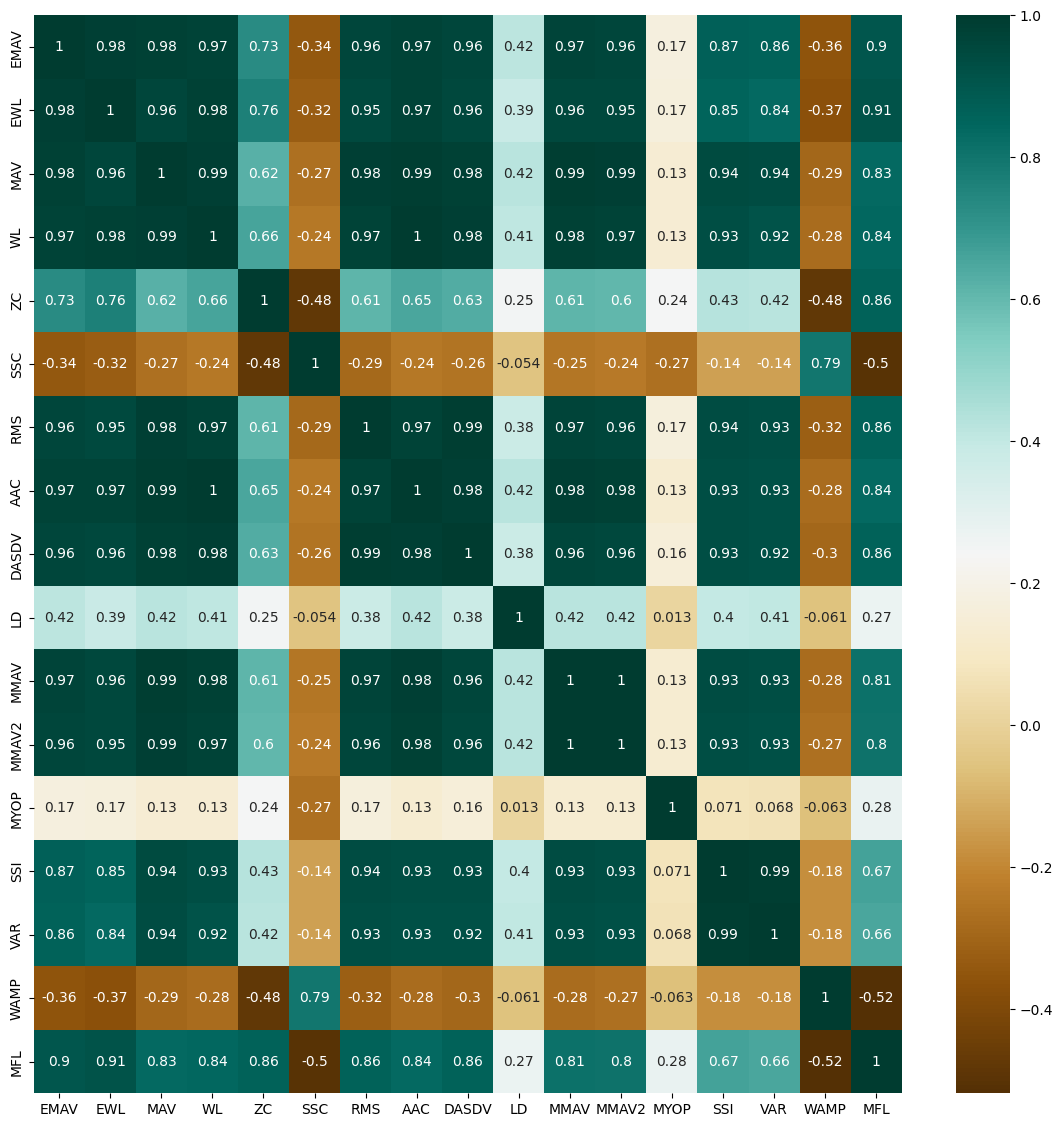

In [73]:
import seaborn as sns
plt.figure(figsize=(14,14))
sns.heatmap(corr_df, annot=True, cmap='BrBG')

In [74]:
print(X.var())
#X.cov().transpose()

EMAV        0.004693
EWL        20.602878
MAV         0.002146
WL         13.161783
ZC         71.061227
SSC        13.165276
RMS         0.004798
AAC         0.005558
DASDV       0.012185
LD          0.004671
MMAV        0.001296
MMAV2       0.001345
MYOP        0.134927
SSI         0.899433
VAR         0.000374
WAMP     9748.394185
MFL         0.236965
dtype: float64


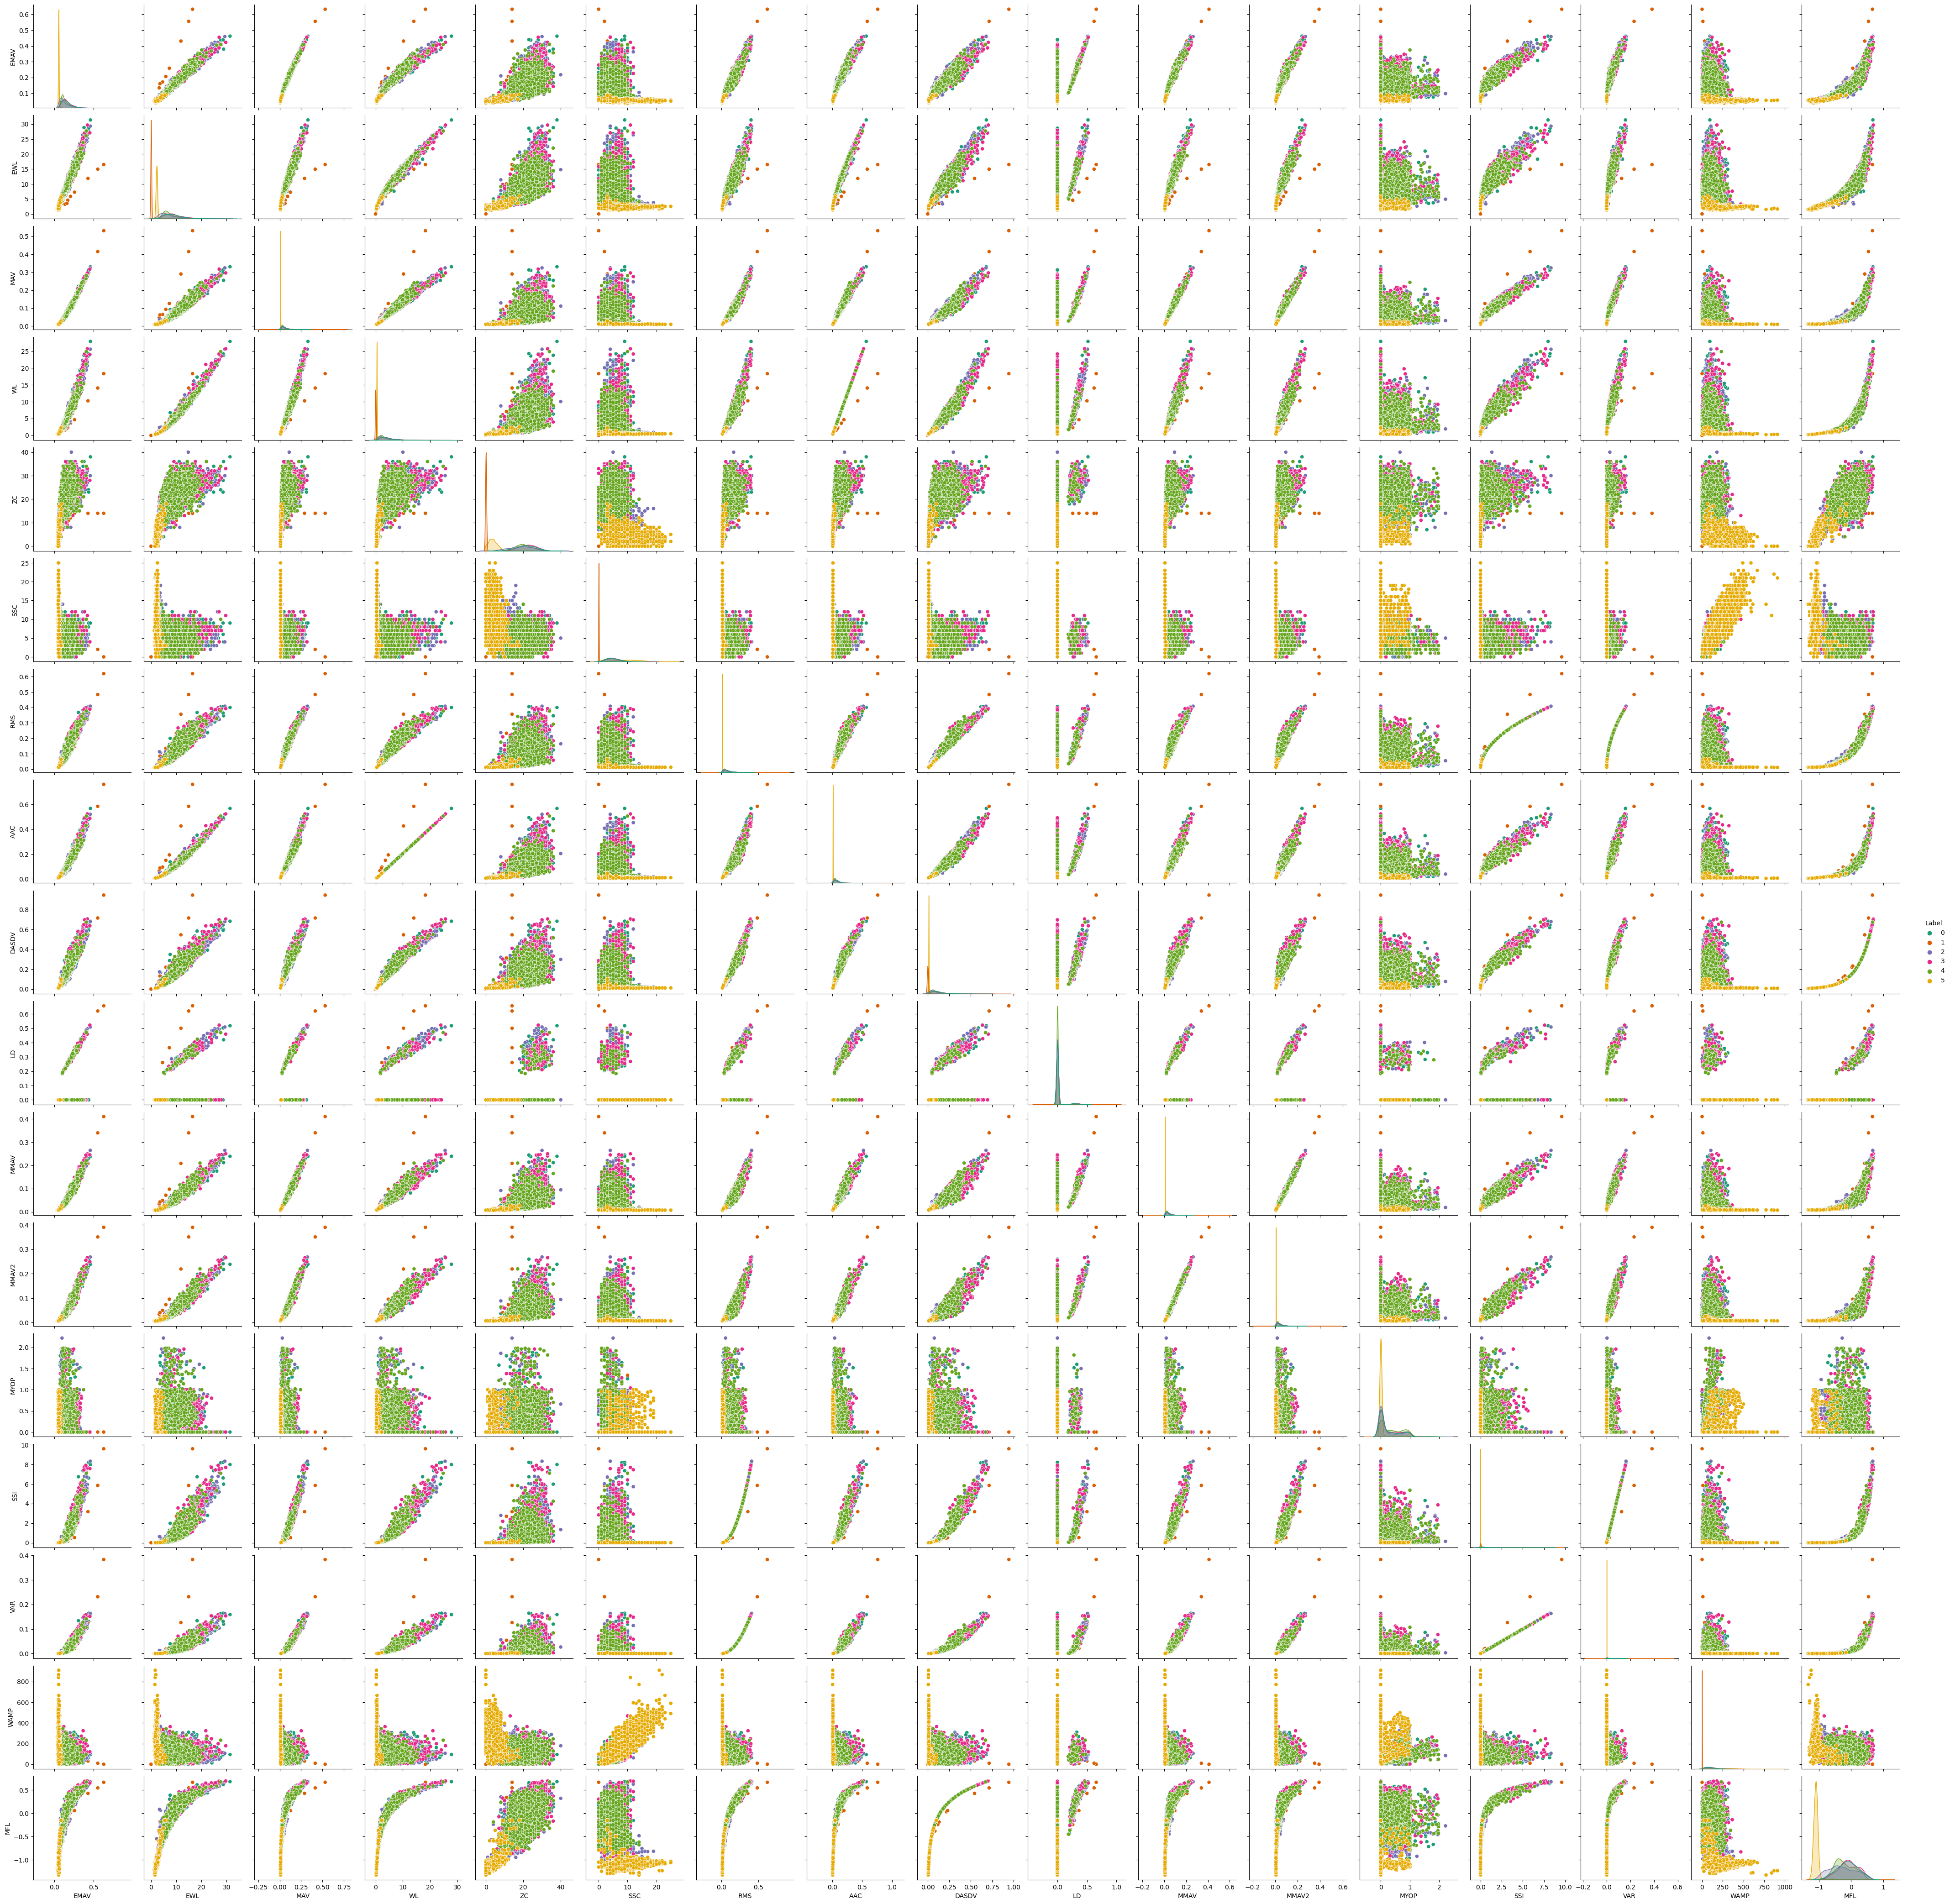

In [8]:
import seaborn as sns
sns.pairplot(datos,hue='Label',palette='Dark2')

In [96]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from matplotlib import gridspec
import numpy as np
 
mm = MinMaxScaler()
# mm_data = mm.fit_transform(datos)

X1_n=datos.iloc[:,[2, 4, 5, 12, 15]] # jMAV jWL jZC jRMS jSSI
X1 = np.array(mm.fit_transform(X1_n))

#X1=datos.iloc[:,[2, 3, 4, 6, 12]]
y=datos.iloc[:,17]

print(X1)
print(y)

[[0.0378314  0.475      0.08       0.         0.03076923]
 [0.02412869 0.475      0.08       0.15315315 0.03076923]
 [0.01072386 0.25       0.36       0.         0.12527473]
 ...
 [0.00268097 0.1        0.2        0.24324324 0.10879121]
 [0.00565982 0.225      0.28       0.         0.08571429]
 [0.01757522 0.2        0.16       0.28828829 0.1021978 ]]
0        0
1        0
2        0
3        0
4        0
        ..
11419    5
11420    5
11421    5
11422    5
11423    5
Name: Label, Length: 9536, dtype: int64


***Obtencion de Hiperparametros para la Maquina de Vectores Soporte***

***1.Lineal***

In [97]:
#separamos dataset en train y test
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
x_train,x_test,y_train,y_test=train_test_split(X1,y,test_size=0.3,random_state=1)

In [98]:
from sklearn.model_selection import GridSearchCV

#define los parametros del rango
param_grid={'C':[0.01,0.1,1,10,100,1000]}

#Ajuste del modelo para la busqueda en la red

grid = GridSearchCV(
        estimator  = SVC(kernel= "linear"),
        param_grid = param_grid,
        scoring    = 'accuracy',
        n_jobs     = -1,
        cv         = 3, 
        verbose    = 1,
        return_train_score = True )

grid.fit(x_train,y_train)
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False) \
    .head(5)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


param_C  mean_test_score  std_test_score  mean_train_score  std_train_score
5    1000         0.455431        0.005009          0.462846         0.000764
4     100         0.453184        0.005142          0.460674         0.001433
3      10         0.451985        0.005063          0.458202         0.001502
2       1         0.450187        0.004125          0.455431         0.001425
1     0.1         0.436854        0.007583          0.439251         0.005713

In [100]:
from sklearn.datasets import load_digits
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

x_train, y_train = load_digits(return_X_y=True)
naive_bayes = GaussianNB()
svc = SVC(kernel="rbf", gamma=0.001)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import seaborn as sb

classifier = SVC(kernel="linear").fit(x_train,y_train)
classifier.predict(x_train)

y_pred = classifier.predict(x_test)


In [102]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Crear los clasificadores
naive_bayes = GaussianNB()
svc = SVC(kernel="linear")

# Entrenar los clasificadores
naive_bayes.fit(x_train, y_train)
svc.fit(x_train, y_train)

SVC(kernel='linear')

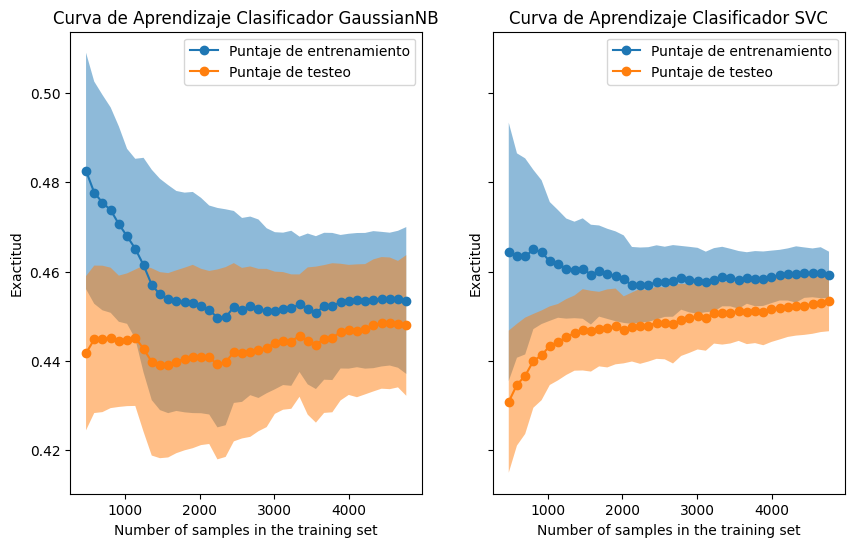

In [103]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharey=True)

common_params = {
    "X": X1,
    "y": y,
    "train_sizes": np.linspace(0.1, 1.0, 40),
    "cv": ShuffleSplit(n_splits=50, test_size=0.5, random_state=0),
    "score_type": "both",
    "n_jobs": 5,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Exactitud",
}

for ax_idx, estimator in enumerate([naive_bayes, svc]):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Puntaje de entrenamiento", "Puntaje de testeo"])
    ax[ax_idx].set_title(f"Curva de Aprendizaje Clasificador {estimator.__class__.__name__}")

In [89]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import seaborn as sb
from sklearn.metrics import accuracy_score


classifier = SVC(kernel="linear").fit(x_train,y_train)
classifier.predict(x_test)

# Make predictions on the test set
y_pred = classifier.predict(x_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.46067808458580917


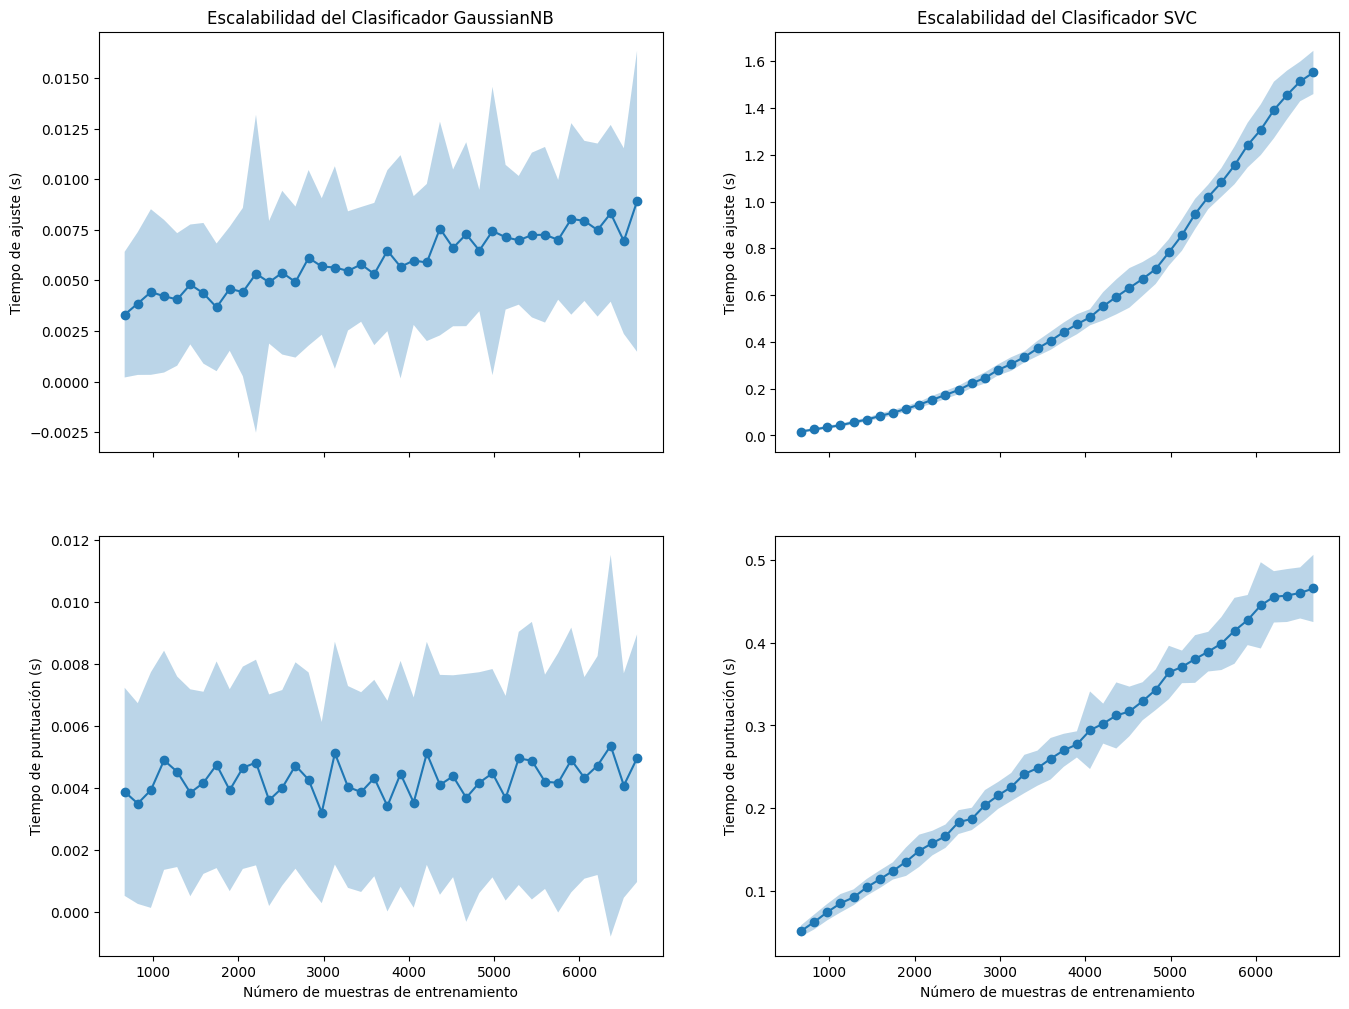

In [104]:
from sklearn.model_selection import learning_curve

common_params = {
    "X": X1,
    "y": y,
    "train_sizes": np.linspace(0.1, 1.0, 40),
    "cv": ShuffleSplit(n_splits=50, test_size=0.3, random_state=0),
    "n_jobs": 5,
    "return_times": True,
}

train_sizes, _, test_scores_nb, fit_times_nb, score_times_nb = learning_curve(
    naive_bayes, **common_params
)
train_sizes, _, test_scores_svm, fit_times_svm, score_times_svm = learning_curve(
    svc, **common_params
)

ffig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 12), sharex=True)

for ax_idx, (fit_times, score_times, estimator) in enumerate(
    zip(
        [fit_times_nb, fit_times_svm],
        [score_times_nb, score_times_svm],
        [naive_bayes, svc],
    )
):
    # scalability regarding the fit time
    ax[0, ax_idx].plot(train_sizes, fit_times.mean(axis=1), "o-")
    ax[0, ax_idx].fill_between(
        train_sizes,
        fit_times.mean(axis=1) - fit_times.std(axis=1),
        fit_times.mean(axis=1) + fit_times.std(axis=1),
        alpha=0.3,
    )
    ax[0, ax_idx].set_ylabel("Tiempo de ajuste (s)")
    ax[0, ax_idx].set_title(
        f"Escalabilidad del Clasificador {estimator.__class__.__name__}"
    )

    # scalability regarding the score time
    ax[1, ax_idx].plot(train_sizes, score_times.mean(axis=1), "o-")
    ax[1, ax_idx].fill_between(
        train_sizes,
        score_times.mean(axis=1) - score_times.std(axis=1),
        score_times.mean(axis=1) + score_times.std(axis=1),
        alpha=0.3,
    )
    ax[1, ax_idx].set_ylabel("Tiempo de puntuación (s)")
    ax[1, ax_idx].set_xlabel("Número de muestras de entrenamiento")

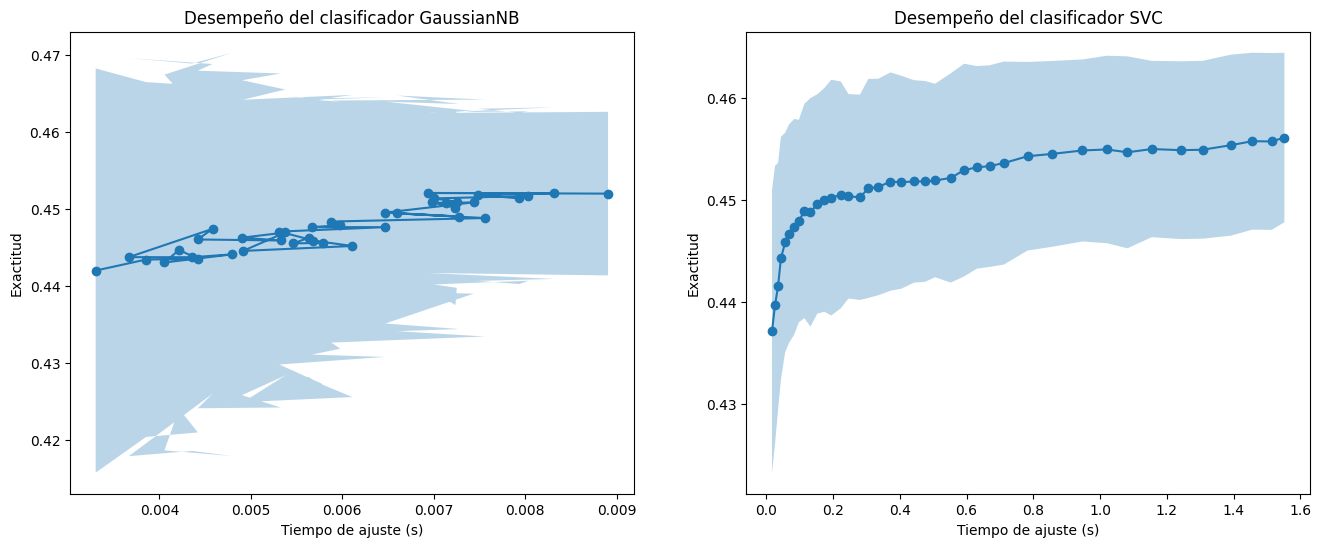

In [105]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

for ax_idx, (fit_times, test_scores, estimator) in enumerate(
    zip(
        [fit_times_nb, fit_times_svm],
        [test_scores_nb, test_scores_svm],
        [naive_bayes, svc],
    )
):
    ax[ax_idx].plot(fit_times.mean(axis=1), test_scores.mean(axis=1), "o-")
    ax[ax_idx].fill_between(
        fit_times.mean(axis=1),
        test_scores.mean(axis=1) - test_scores.std(axis=1),
        test_scores.mean(axis=1) + test_scores.std(axis=1),
        alpha=0.3,
    )
    ax[ax_idx].set_ylabel("Exactitud")
    ax[ax_idx].set_xlabel("Tiempo de ajuste (s)")
    ax[ax_idx].set_title(
        f"Desempeño del clasificador {estimator.__class__.__name__}"
    )

plt.show()